
# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 1</p>
## <p style="text-align: center;">Total points: 75</p>
## <p style="text-align: center;">Due: Tuesday, September 13 submitted via Canvas by 11:59 p</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group.  

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1: Applications of machine learning (10 pts)

Read the [article](http://www.datasciencecentral.com/profiles/blogs/20-data-science-systems-used-by-amazon-to-operate-its-business) "21 data science systems used by Amazon to operate its business" and pick any two of the data science systems used by Amazon according to this blog.

(5 pts each) For each of these two system you have chosen:

What kind of machine learning problem is involved (e.g. classification, regression, clustering, outlier detection,...)? Speculate on what kind of data may be needed and how the results can be useful to the company.


## Answer




<font size=4.5>
**1) Fake reviews detection. **
It is mainly a classification problem to classify if a review is fake or not and then filter the fake ones out. The dataset might contain following data:<br>
</font>
<br>
<font size=3.5>
** __Text of the review__ ** : To evaluate how clear and grammarly the review conveys the ideas and assess the text quality  itself. <br>

** __Other people's 'score for rhe usefulness of that review__ ** : Like on amazon.com sometime people vote for if this review is useful, this can be an important factor to determin whether a review is fake.<br>

** __The reviewers' social network__ **: If the reviewer have a lot of connections on the network and how his or her friends' review quality. If the reviewer interact with those connection very often. Just help to assess if it is a real person.<br>

** __The reviewers' review history__ **: Including the reviews' quality as well as the response time and IP to evaluate if this is a real person or a robot.<br>

** __The reviewers' purchasing history__ **: If this account just comment and never or seldom buy anything, it is more likely to be a robot that provide fake review.<br>
</font>
<br>

<font size=4.5>
**2) Inventory forecasting. **
It is mainly a regression problem to predict and decide how many inventories we need:<br>
</font>
<br>
<font size=3.5>
** __The basic information of the items __ **: How large and how heavy of the item and what kind of environment(humidity and temperature) it needs. How long can it be stored before it goes bad.<br>

** __Requirements from the customer__ **: How many customers view that item's purchasing page and how many of them find there is no inventory. The time they view the webpage(if there is any pattern related to time, month of year or weather when customers need this item)<br>

** __Business information about this item __ **: The price and profit we can get from this item, the cost of transportation, how long it normally takes to ship this product etc.

# Question 2: Maximum likelihood estimate (10 pts)

Suppose a manager at an internet sales company wants to estimate how fast his salesperson is generating successful leads. Instead of recording the time for each lead, the time taken to generate the next 5 leads are recorded, i.e., there is one recording (denoting the elapsed time) for every 5 consecutive leads. For a specific salesperson, the time intervals recorded are {1,3,1.5,4,2,7,1.2,2,4,3.1} hours. 

A statistician suggests that if these time intervals are assumed to arise by i.i.d. sampling from the following distribution:
$$ p(t) = \frac{1}{C \times \theta^{5}}t^{4}exp^{-\frac{t}{\theta}},$$
(where C is a normalizing constant). Therefore, if $\theta$ can be estimated, then he can provide detailed information
about the lead generation process, including average rates, variances etc.

Find the Maximum Likelihood estimate for $\theta$ based on the recorded observations

## Answer

$$ ln\ likelyhood=ln(\prod_{i=1}^{n}{p(t_i))} $$
$$ = ln(\prod_{i=1}^{n}{\frac{1}{C \times \theta^{5}}t_i^{4}exp^{-\frac{t_i}{\theta}}})$$
$$ = \sum_{i=1}^{n} {Ln(p(t_i)) = \sum_{i=1}^{n}({-\frac{t_i}{ \theta }+4ln(t_i)-ln(C)-5ln( \theta )}})$$
Take derivative of this log likelihood we get first order condition of:
$$ \frac{\partial ln\ likelihood}{\partial \theta}=\sum_{i=1}^{n}({\frac{t_i}{ \hat{ \theta}^2}-\frac{5}{ \hat{ \theta}}}) = 0 $$
and since we know $\hat{ \theta} \neq 0$ so we got:
$$ \hat{\theta} = \frac{\sum_{i=1}^{n}{t_i}}{5n}=\frac{1+3+1.5+4+2+7+1.2+2+4+3.1}{5*10}=0.576$$
<br>
**( According to the data, $n=number\ of\ the\ observations =10$ )**

In [16]:
m=1+3+1.5+4+2+7+1.2+2+4+3.1
m/50

0.5760000000000001

# Question 3: Multiple Linear Regression in Python (25 pts)

Use the following code to import the boston housing dataset and linear models in python.



In [98]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
import numpy as np

boston = datasets.load_boston()

X = boston.data
y = boston.target

## Answer



The dataset information can be found [here](http://scikit-learn.org/stable/datasets/index.html#boston-house-prices-dataset).

a. (3 pts) Print the shape (number of rows and columns) of the feature matrix, and print the first 5 rows.



In [27]:
row_num , col_num = X.shape
print 'Total number of rows is:' , row_num
print 'Total number of columns is:' , col_num
print 'The first 5 rows are:'
X[:5,]

Total number of rows is: 506
Total number of columns is: 13
The first 5 rows are:


array([[  6.32000000e-03,   1.80000000e+01,   2.31000000e+00,
          0.00000000e+00,   5.38000000e-01,   6.57500000e+00,
          6.52000000e+01,   4.09000000e+00,   1.00000000e+00,
          2.96000000e+02,   1.53000000e+01,   3.96900000e+02,
          4.98000000e+00],
       [  2.73100000e-02,   0.00000000e+00,   7.07000000e+00,
          0.00000000e+00,   4.69000000e-01,   6.42100000e+00,
          7.89000000e+01,   4.96710000e+00,   2.00000000e+00,
          2.42000000e+02,   1.78000000e+01,   3.96900000e+02,
          9.14000000e+00],
       [  2.72900000e-02,   0.00000000e+00,   7.07000000e+00,
          0.00000000e+00,   4.69000000e-01,   7.18500000e+00,
          6.11000000e+01,   4.96710000e+00,   2.00000000e+00,
          2.42000000e+02,   1.78000000e+01,   3.92830000e+02,
          4.03000000e+00],
       [  3.23700000e-02,   0.00000000e+00,   2.18000000e+00,
          0.00000000e+00,   4.58000000e-01,   6.99800000e+00,
          4.58000000e+01,   6.06220000e+00,   3.000

b.  (6 pts) Using ordinary least squares, fit a multiple linear regression (MLR) on all the feature variables using the entire dataset (506 rows). Report the regression coefficient of each input feature and evaluate the model using mean squared error (MSE).  Example of ordinary least squares in Python is shown in Section 1.1.1 of http://scikit-learn.org/stable/modules/linear_model.html.



In [38]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit (X, y)
yhat=reg.predict(X)
print("Mean squared error: %.2f"
      % mean_squared_error(y, yhat))
print 'Coefficients: \n', reg.coef_


Mean squared error: 21.90
Coefficients: 
[ -1.07170557e-01   4.63952195e-02   2.08602395e-02   2.68856140e+00
  -1.77957587e+01   3.80475246e+00   7.51061703e-04  -1.47575880e+00
   3.05655038e-01  -1.23293463e-02  -9.53463555e-01   9.39251272e-03
  -5.25466633e-01]


c.  (6 pts) Split the data into a training set and a test set.  Use the first 400 rows for training set and remaining rows for test set.  Fit an MLR using the training set.  Evaluate the trained model using the training set and the test set, respectively.  Compare the two MSE values thus obtained.



In [41]:

Boston_X_train = X[:400,]
Boston_X_test = X[400:,]
Boston_y_train = y[:400]
Boston_y_test = y[400:]

regr = linear_model.LinearRegression()
regr.fit(Boston_X_train, Boston_y_train)
Boston_y_pred = regr.predict(Boston_X_test)
print 'Coefficients:', regr.coef_
print("Mean squared error: %.2f"
      % mean_squared_error(Boston_y_test, Boston_y_pred))


Coefficients: [ -1.91246374e-01   4.42289967e-02   5.52207977e-02   1.71631351e+00
  -1.49957220e+01   4.88773025e+00   2.60921031e-03  -1.29480799e+00
   4.84787214e-01  -1.54006673e-02  -8.08795026e-01  -1.29230427e-03
  -5.17953791e-01]
Mean squared error: 38.16


d.  (6 pts) Do you think your MLR model is reasonable for this problem? You may look at the distribution of residuals to provide an informed answer.



In [81]:
residual=Boston_y_test-Boston_y_pred
import matplotlib.pyplot as plt  
import statsmodels.api as sm 
%matplotlib inline  
print 'Residual mean:', residual.mean()
print 'Residual std:', residual.std()

Residual mean: -3.60094927386
Residual std: 5.01971144293


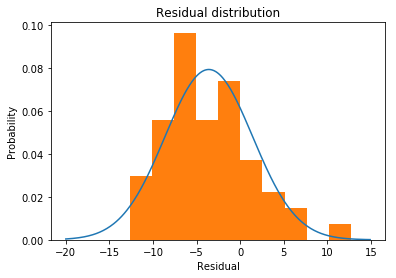

In [82]:
def normfun(x,mu,sigma):
    pdf = np.exp(-((x - mu)**2)/(2*sigma**2)) / (sigma * np.sqrt(2*np.pi))
    return pdf
#accrding to the mean and std, we set the range of the plot
x = np.arange(-20,15,0.1) 
y = normfun(x, residual.mean(), residual.std()) 
plt.plot(x,y) 
plt.hist(residual, normed=True) 
plt.title('Residual distribution') 
plt.xlabel('Residual') 
plt.ylabel('Probability') 
plt.show()


It is not like a normal distribution, so we just can conclude that the MLR is not a good idea in that case.

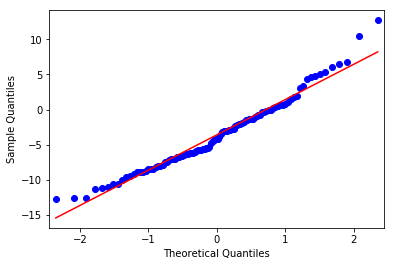

In [84]:

#Plus, in real case people look at the QQ plot more often so let us just have a look at this plot:
sm.qqplot(residual.flatten(),line='s')  
plt.show() 

e. (5 pts) Use the following code to add new features to the dataset.  You should have 26 variables now.  Note that this code adds one squared term for each variable; in practice one may introduce only a few terms based on domain knowledge or experimentation.  Repeat (c) and report the MSE values of the training set and the test set, respectively.

In [99]:
X = np.concatenate((X, np.square(X)), axis=1)
Boston_X_train = X[:400,]
Boston_X_test = X[400:,]
Boston_y_train = y[:400]
Boston_y_test = y[400:]

regr = linear_model.LinearRegression()
regr.fit(Boston_X_train, Boston_y_train)
Boston_y_pred = regr.predict(Boston_X_test)
print 'Coefficients:', regr.coef_
print("Mean squared error: %.2f"
      % mean_squared_error(Boston_y_test, Boston_y_pred))


Coefficients: [ -6.28564029e-01  -4.69283413e-02   1.35998008e-01   1.12670518e+00
  -3.89085940e+01  -1.71470367e+01  -1.92714017e-02  -2.49211073e+00
   6.85468872e-01  -1.10900553e-01  -6.25152381e+00   4.25358263e-02
  -1.43915460e+00   5.03672853e-03   5.35234383e-04  -4.91394588e-03
   1.12670518e+00   1.11228197e+01   1.61544902e+00   2.97952872e-04
   1.37189224e-01  -3.37949389e-02   1.47365245e-04   1.54711150e-01
  -7.67778717e-05   2.70068424e-02]
Mean squared error: 32.95


# Question 4: Ridge and Lasso Regression (25 points)


Using the same boston data from before, in this question you will explore the application of Lasso and Ridge regression using sklearn package in Python. The following code will split the data into training and test set using [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with **random state 20** and **test_size = 0.33**.  Note: lambda is called alpha in sklearn.

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.linear_model import ridge
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state=20)

## Answer

1) Use sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes to do a [5-fold cross validation](http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#example-exercises-plot-cv-diabetes-py) using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html). For the sweep of the regularization parameter, we will look at a grid of values ranging from $\lambda = 10^{10}$ to $\lambda = 10^{-2}$. In Python, you can consider this range of values as follows:

      import numpy as np

      alphas =  10**np.linspace(10,-2,100)*0.5

  Report the best chosen $\lambda$ based on cross validation. The cross validation should happen on your training data using  average MSE as the scoring metric. (8pts)





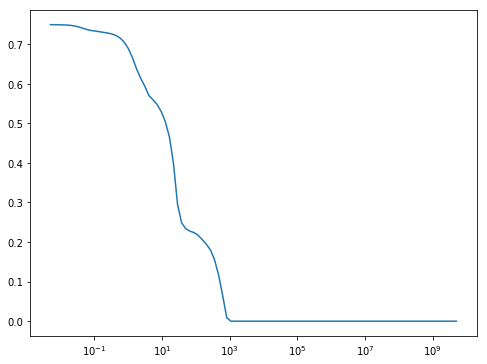

In [136]:
X = boston.data
y = boston.target
lasso = Lasso(random_state=0)
alphas =  10**np.linspace(10,-2,100)*0.5

tuned_parameters = [{'alpha': alphas}]
n_folds = 5

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X, y)
scores = clf.cv_results_['mean_train_score']
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

Answer to the bonus question: how much can you trust the selection of alpha?

Alpha parameters maximising the generalization score on different
subsets of the data:
[fold 0] alpha: 1.75560, score: 0.45718
[fold 1] alpha: 1.75560, score: 0.62599
[fold 2] alpha: 1.32804, score: 0.26764
[fold 3] alpha: 0.14240, score: 0.11186
[fold 4] alpha: 0.24885, score: -0.04579

Answer: Not very much since we obtained different alphas for different
subsets of the data and moreover, the scores for these alphas differ
quite substantially.


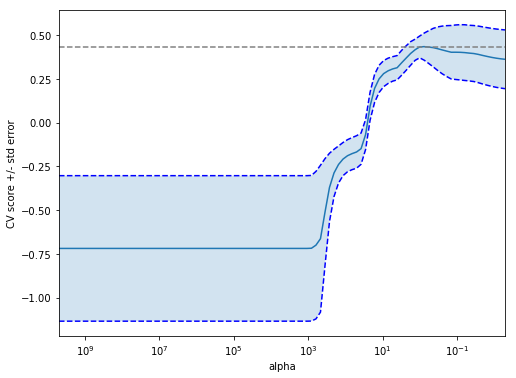

In [106]:
X = boston.data
y = boston.target
lasso = Lasso(random_state=0)
alphas =  10**np.linspace(10,-2,100)*0.5

tuned_parameters = [{'alpha': alphas}]
n_folds = 5

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X, y)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])

# #############################################################################
# Bonus: how much can you trust the selection of alpha?

# To answer this question we use the LassoCV object that sets its alpha
# parameter automatically from the data by internal cross-validation (i.e. it
# performs cross-validation on the training data it receives).
# We use external cross-validation to see how much the automatically obtained
# alphas differ across different cross-validation folds.
lasso_cv = LassoCV(alphas=alphas, random_state=0)
k_fold = KFold(5)

print("Answer to the bonus question:",
      "how much can you trust the selection of alpha?")
print()
print("Alpha parameters maximising the generalization score on different")
print("subsets of the data:")
for k, (train, test) in enumerate(k_fold.split(X, y)):
    lasso_cv.fit(X[train], y[train])
    print("[fold {0}] alpha: {1:.5f}, score: {2:.5f}".
          format(k, lasso_cv.alpha_, lasso_cv.score(X[test], y[test])))
print()
print("Answer: Not very much since we obtained different alphas for different")
print("subsets of the data and moreover, the scores for these alphas differ")
print("quite substantially.")

plt.show()

In [125]:


for k, (train, test) in enumerate(k_fold.split(X, y)):
    lasso_cv.fit(X[train], y[train])
    print("[fold {0}] alpha: {1:.5f}, score: {2:.5f}".
          format(k, lasso_cv.alpha_, lasso_cv.score(X[train], y[train])))

plt.show()

[fold 0] alpha: 1.75560, score: 0.65376
[fold 1] alpha: 1.75560, score: 0.64131
[fold 2] alpha: 1.32804, score: 0.60779
[fold 3] alpha: 0.14240, score: 0.83231
[fold 4] alpha: 0.24885, score: 0.72292


In [128]:
ridge_cv = RidgeCV(alphas=alphas)
k_fold = KFold(5)

for k, (train, test) in enumerate(k_fold.split(X, y)):
    ridge_cv.fit(X[train], y[train])
    print("[fold {0}] alpha: {1:.5f}, score: {2:.5f}".
          format(k, ridge_cv.alpha_, ridge_cv.score(X[train], y[train])))
print()
plt.show()

[fold 0] alpha: 0.03527, score: 0.74652
[fold 1] alpha: 0.04663, score: 0.72758
[fold 2] alpha: 0.01527, score: 0.69503
[fold 3] alpha: 0.02668, score: 0.84181
[fold 4] alpha: 0.08149, score: 0.73542



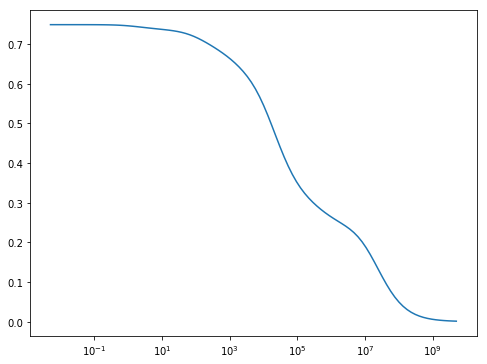

In [133]:
from sklearn.linear_model import Ridge
ridge_model = Ridge()
clf = GridSearchCV(ridge_model, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X, y)
scores = clf.cv_results_['mean_train_score']
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

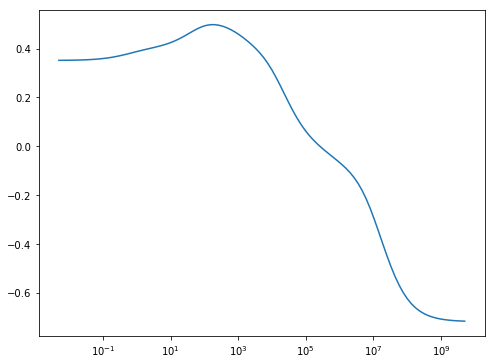

In [134]:
from sklearn.linear_model import Ridge
ridge_model = Ridge()
clf = GridSearchCV(ridge_model, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X, y)
scores = clf.cv_results_['mean_test_score']
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

2) Run ridge and lasso for all of the alphas specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; the plots for different features for a method should be on the same plot (e.g. Fig 6.6 of JW). What do you qualitatively observe when value of the regularization parameter is changed? (7pts)



3) Run least squares regression, ridge, and lasso on the training data. For ridge and lasso, use only the best regularization parameter. Report the prediction error (MSE) on the test data for each. (5pts)



4) Run lasso again with cross validation using [sklearn.linear_model.LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). Set the cross validation parameters as follows:

    LassoCV(alphas=None, cv=10, max_iter=10000)

Report the best $\lambda$ based on cross validation. Run lasso on the training data using the best $\lambda$ and report the coefficeints for 26 variables. What do you observe from these coefficients? (5pts)

# Question 5  (5 pts)

A regression model that includes "interaction terms" (i.e. quadratic terms of the form $x_ix_j$) as predictors in addition to the linear terms is clearly more general than a corresponding model that employs the same independent variables but only uses the linear terms. Outline two situations where the simpler (less general) model would be preferred to the more powerful model that includes interactive terms.

## Answer



**The first situation** is quite obvious, just when the sample size is too small to run a model with interaction terms.<br>
We all know that when we expand our model(i.e. including more features into the model) we need more _$ degree\ of\ freedom $_ .  <br>
A really common example here is when we use the DNA data of a person to predict his probability of getting a certain disease. The total dimention of feature space is just so large and if we want to have a fully interacted model of all of these features, the total number of the sample that needed to support that model would be exploded.<br>
<br>
**The second situation** is when we care about $ the\ main\ effect $ of a feature more than the interactive effect between two feactures, in other words we focus more on the average effect of one feature's effect to the outcome and we average out the other feature.<br>
Such as when we want to focus on if women are discriminated in the job market, we just need to focus on if the coefficient of gender is statistically significant negative holding all else being equal when analysising the salary and we do not care about whether there is an interactive effect between gender and education level since including the interaction term may mess up the model and make the coefficient of gender not significant.